# ASSIGNMENT (TESTLINE)

This code defines a function called fetch_data(url) that makes a request to a given URL to get data. It uses the requests library to send a GET request to the URL. If the request is successful (i.e., the server responds with status code 200), the function returns the data in JSON format. If there's an issue with the request, it prints a failure message and returns None, so you know something went wrong.

In [49]:
import requests
import pandas as pd

# Function to fetch data from a given URL
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data from {url}")
        return None

This section defines a list of URLs called urls, where each URL points to a different online resource containing JSON data. These URLs are used in the script to fetch data from external sources. The URLs can be for APIs or data storage services that provide structured data in JSON format.

In [50]:
# URLs
urls = [
    "https://www.jsonkeeper.com/b/LLQT",
    "https://api.jsonserve.com/rJvd7g",
    "https://api.jsonserve.com/XgAgFJ"
]


In this section, the code loops through each URL in the urls list and calls the fetch_data() function to retrieve data from each one. If data is successfully fetched (i.e., the data is not None), it stores the data in a dictionary called datasets. The URL acts as the key, and the fetched data is stored as the value. This allows you to easily access the data later, using the corresponding URL as a reference.

In [51]:
# Fetching data from each URL
datasets = {}
for url in urls:
    data = fetch_data(url)
    if data:
        datasets[url] = data


This part of the code processes the fetched data by attempting to convert it into a pandas DataFrame. It checks the structure of the data for each URL stored in the datasets dictionary. If the data is a list of dictionaries, it directly converts it into a DataFrame. If the data is a dictionary, it prints the keys to help understand the structure, with a suggestion to extract data from specific keys if necessary. If the data is neither a list nor a dictionary, it prints a warning. If there’s an error during the conversion (e.g., due to an incorrect structure), it catches the exception and prints an error message.

In [52]:
# Convert datasets to DataFrames and store in a dictionary
dataframes = {}
for url in urls:
    try:
        # Check if the data is a list of dictionaries
        if isinstance(datasets[url], list):
            dataframes[url] = pd.DataFrame(datasets[url])
        elif isinstance(datasets[url], dict):
            # Print the keys to understand the structure
            print(f"Keys in the dictionary from {url}: {datasets[url].keys()}")
            # If the relevant data is under a specific key, extract it
            # Example: if the key is 'data', use the following line
            # dataframes[url] = pd.DataFrame(datasets[url]['data'])
            print(f"Data from {url} is a dictionary, please check its structure.")
        else:
            print(f"Data from {url} is neither a list nor a dictionary.")
    except ValueError as e:
        print(f"Error converting to DataFrame from {url}: {e}")


Keys in the dictionary from https://www.jsonkeeper.com/b/LLQT: dict_keys(['quiz'])
Data from https://www.jsonkeeper.com/b/LLQT is a dictionary, please check its structure.
Keys in the dictionary from https://api.jsonserve.com/rJvd7g: dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps'])
Data from https://api.jsonserve.com/rJvd7g is a dictionary, please check its structure.


This part of the code goes through each DataFrame in the dataframes dictionary. For each URL, it checks if the corresponding DataFrame is not empty. If the DataFrame contains data, it calls the explore_data() function (which presumably allows for data exploration or visualization) and labels the dataset with the URL. If the DataFrame is empty, it prints a message indicating that no data was available for that specific URL.

In [53]:
# Explore each dataset if they were successfully created
for url, df in dataframes.items():
    if not df.empty:  # Check if the DataFrame is not empty
        explore_data(df, f"Dataset from {url}")
    else:
        print(f"No data available for {url}.")


Exploring dataset: Dataset from https://api.jsonserve.com/XgAgFJ
First 5 rows:
       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at                     created_at  \
0  2025-01-17T15:30:18.027+05:30  2025-01-17T15:30:18.044+05:30   
1  2025-01-17T15:17:44.042+05:30  2025-01-17T15:17:44.056+05:30   
2  2025-01-16T20:13:19.682+05:30  2025-01-16T20:13:19.699+05:30   
3  2025-01-16T20:00:11.562+05:30  2025-01-16T20:00:11.573+05:30   
4  2025-01-15T20:34:39.462+05:30  2025-01-15T20:34:39.478+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:30:18.044+05:30    108             2     90 %   100  ...   
1  2025-01-17T15:17:44.056+05:30     92           

This section demonstrates data cleaning by applying two main steps to each DataFrame in the dataframes dictionary. First, it handles missing values by filling them with the previous row's value (forward fill) using the fillna() method. This is just one way to handle missing data, and the method can be adjusted as needed. Second, there's an example of how to convert a column’s data type (commented out in the code). After cleaning, the code prints the number of missing values remaining in each DataFrame using df.isnull().sum(), allowing you to verify if there are any issues left.

In [54]:
# Data Cleaning Example
for url, df in dataframes.items():
    # Fill missing values or drop them
    df.fillna(method='ffill', inplace=True)  # Forward fill as an example
    # Convert data types if necessary
    # df['some_column'] = df['some_column'].astype('int')  # Example conversion
    print(f"Cleaned DataFrame from {url}:")
    print(df.isnull().sum())  # Check for remaining missing values

Cleaned DataFrame from https://api.jsonserve.com/XgAgFJ:
id                       0
quiz_id                  0
user_id                  0
submitted_at             0
created_at               0
updated_at               0
score                    0
trophy_level             0
accuracy                 0
speed                    0
final_score              0
negative_score           0
correct_answers          0
incorrect_answers        0
source                   0
type                     0
started_at               0
ended_at                 0
duration                 0
better_than              0
total_questions          0
rank_text                0
mistakes_corrected       0
initial_mistake_count    0
response_map             0
quiz                     0
dtype: int64


This part of the code calculates and prints the descriptive statistics for the numerical columns of each DataFrame. The df.describe(include='number') function is used to generate statistics such as mean, median, standard deviation, minimum, and maximum values, but only for the columns with numerical data. This helps provide a quick summary of the distribution and key characteristics of the numerical data in each dataset.

In [55]:
# Descriptive statistics for numerical columns
for url, df in dataframes.items():
    print(f"\nDescriptive statistics for dataset from {url}:")
    print(df.describe(include='number'))  # Include only numerical columns


Descriptive statistics for dataset from https://api.jsonserve.com/XgAgFJ:
                  id    quiz_id       score  trophy_level  correct_answers  \
count      14.000000  14.000000   14.000000     14.000000        14.000000   
mean   312368.428571  31.500000   60.285714      2.214286        15.071429   
std     38889.139814  20.346045   34.675260      0.699293         8.668815   
min    195808.000000   6.000000   12.000000      1.000000         3.000000   
25%    316613.250000  18.000000   36.000000      2.000000         9.000000   
50%    324964.000000  24.500000   46.000000      2.000000        11.500000   
75%    332307.500000  51.000000   88.000000      3.000000        22.000000   
max    336497.000000  58.000000  116.000000      3.000000        29.000000   

       incorrect_answers  better_than  total_questions  mistakes_corrected  \
count          14.000000    14.000000         14.00000           14.000000   
mean            5.857143   160.000000         55.50000            

This section generates a visualization of the distribution of scores for datasets that include a column named "score." It uses matplotlib and seaborn to create a histogram with a Kernel Density Estimate (KDE) overlay. The sns.histplot() function is used to plot the distribution, with the number of bins set to 10. The title, x-axis, and y-axis labels are customized to provide context specific to each dataset. The visualization helps to understand the spread and frequency of the "score" values in the data.

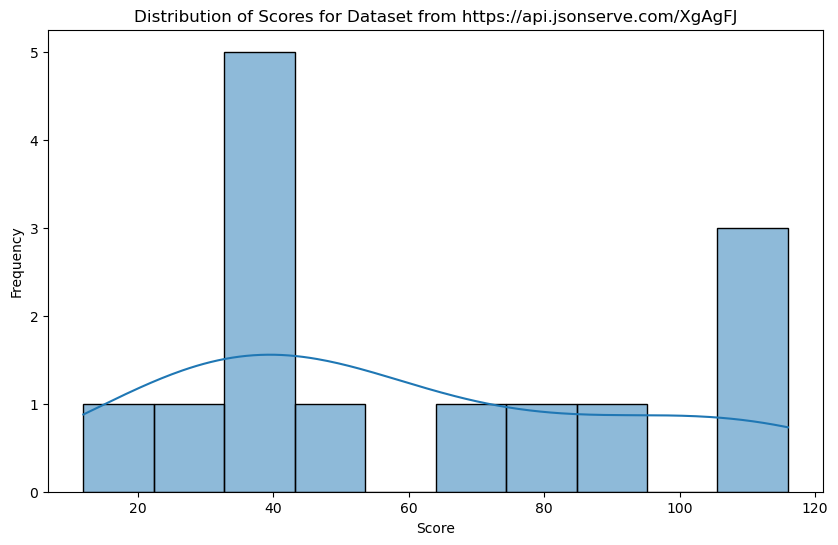

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example Visualization: Distribution of scores
for url, df in dataframes.items():
    if 'score' in df.columns:  # Assuming there's a 'score' column
        plt.figure(figsize=(10, 6))
        sns.histplot(df['score'], bins=10, kde=True)
        plt.title(f'Distribution of Scores for Dataset from {url}')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.show()

This section generates distribution plots for all numerical columns in each dataset. It first selects the numerical columns using df.select_dtypes(include='number'). For each numerical column, it creates a histogram with a Kernel Density Estimate (KDE) overlay using sns.histplot(). The number of bins is set to 20 for a more detailed view of the distribution. The plot includes a title, and labels for the x-axis and y-axis that are specific to each column and dataset. This visualization helps analyze the distribution of values for each numerical feature in the data.

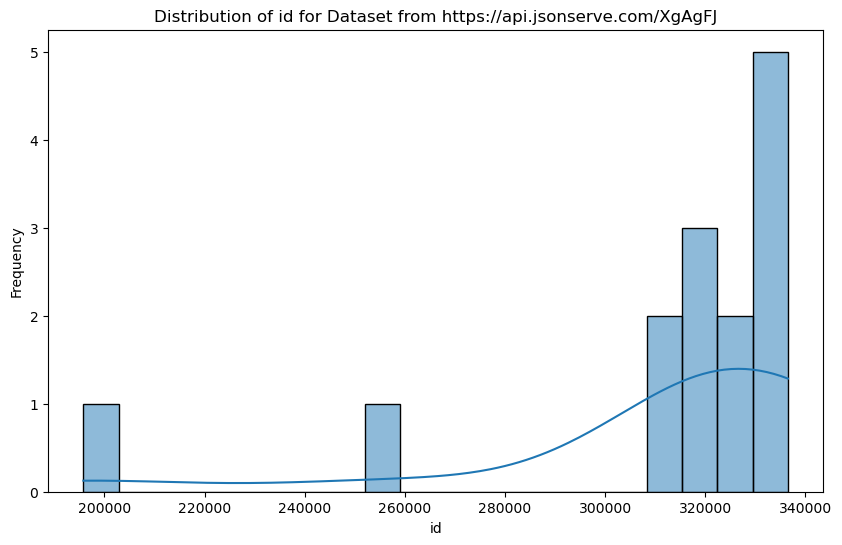

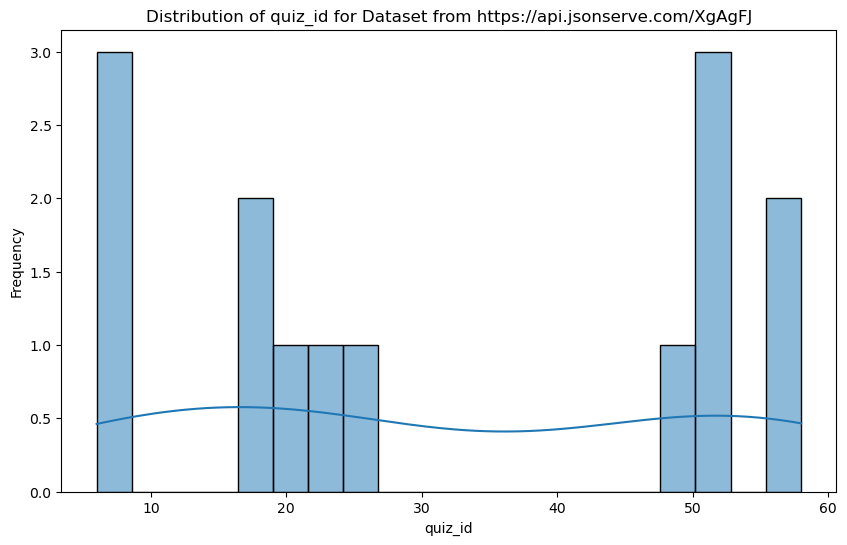

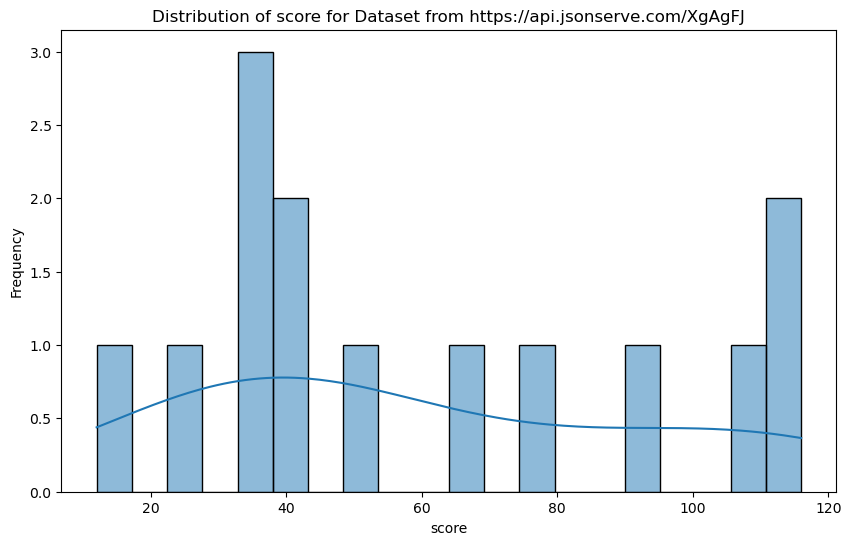

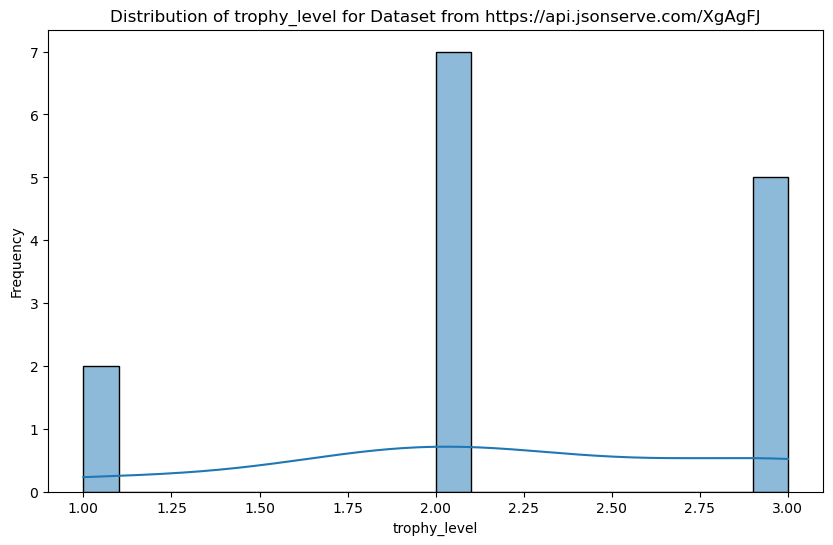

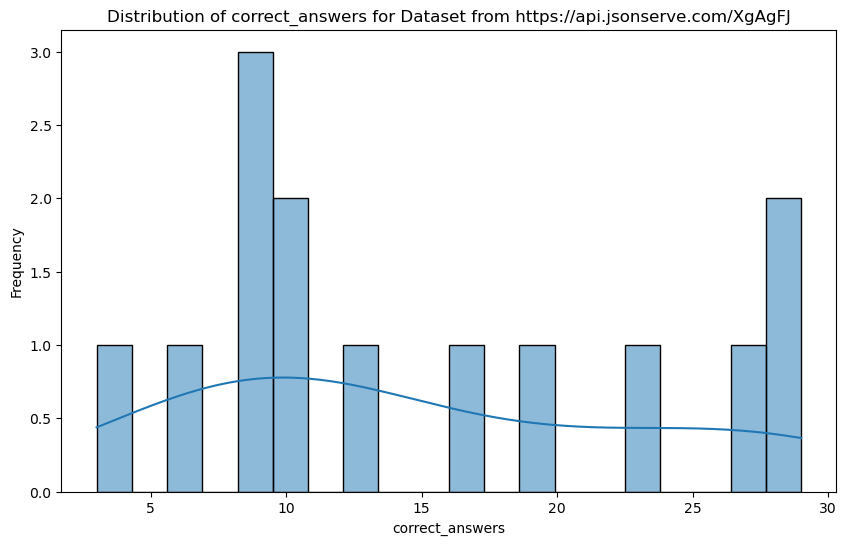

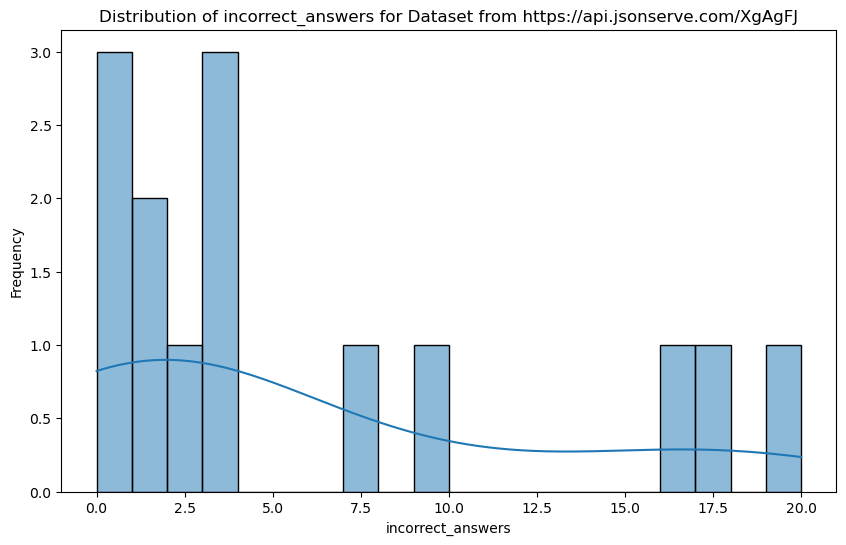

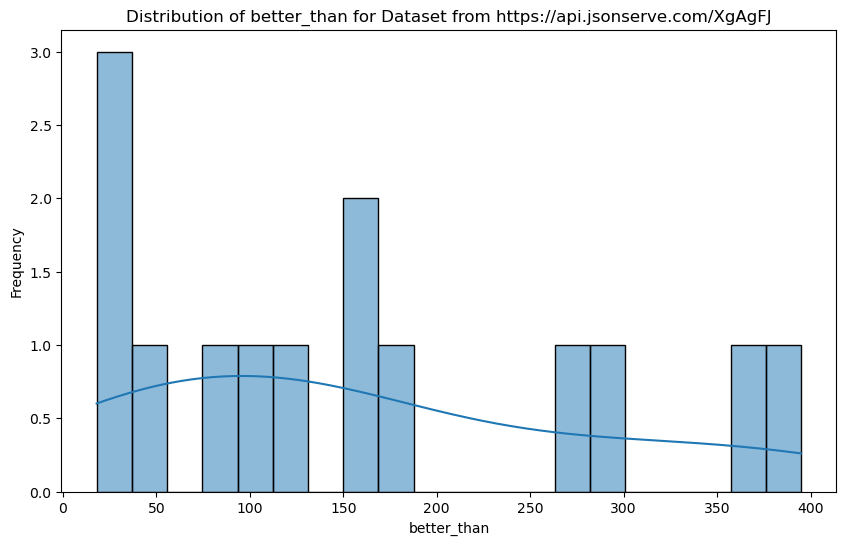

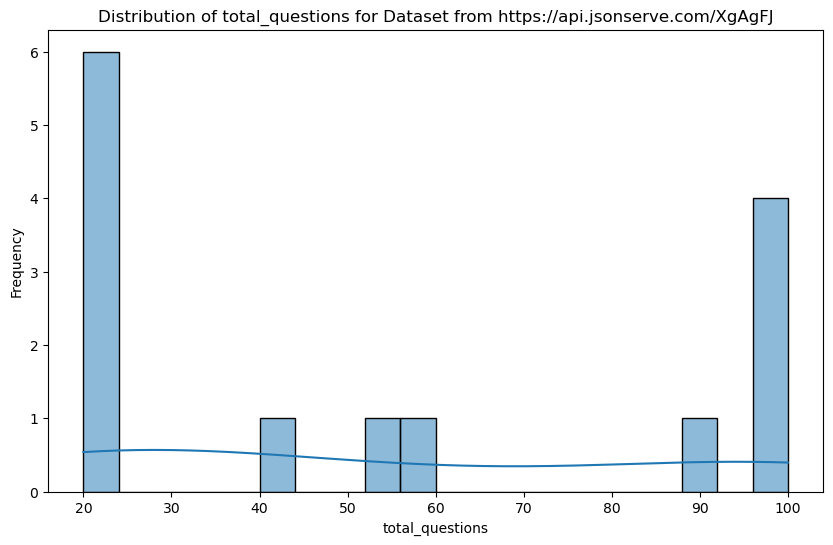

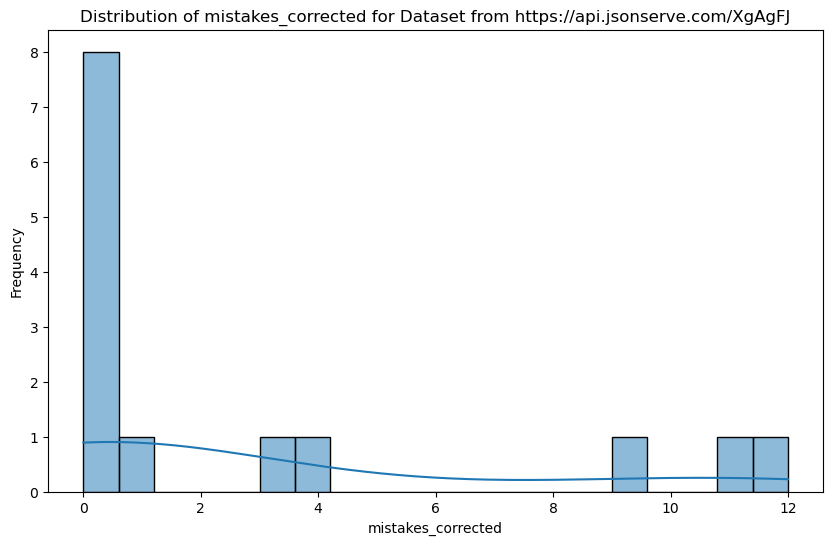

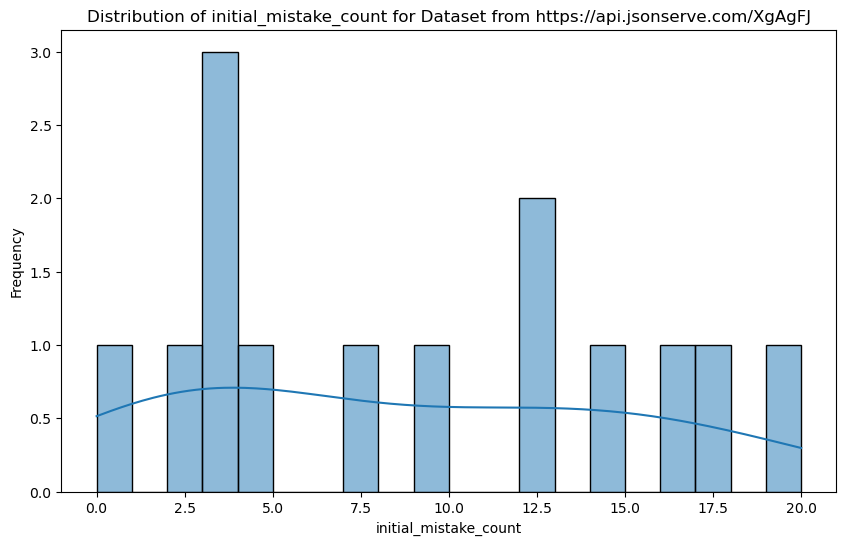

In [57]:
# Distribution plots for numerical columns
for url, df in dataframes.items():
    numerical_cols = df.select_dtypes(include='number').columns
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col} for Dataset from {url}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

This section creates box plots for each numerical column in the datasets. It first selects the numerical columns using df.select_dtypes(include='number'). For each numerical column, a box plot is generated using sns.boxplot(), which visualizes the distribution of the data, highlighting the median, quartiles, and potential outliers. The plot includes a title and a label for the x-axis, which is specific to each column and dataset. Box plots are useful for identifying the spread and potential outliers in the data.

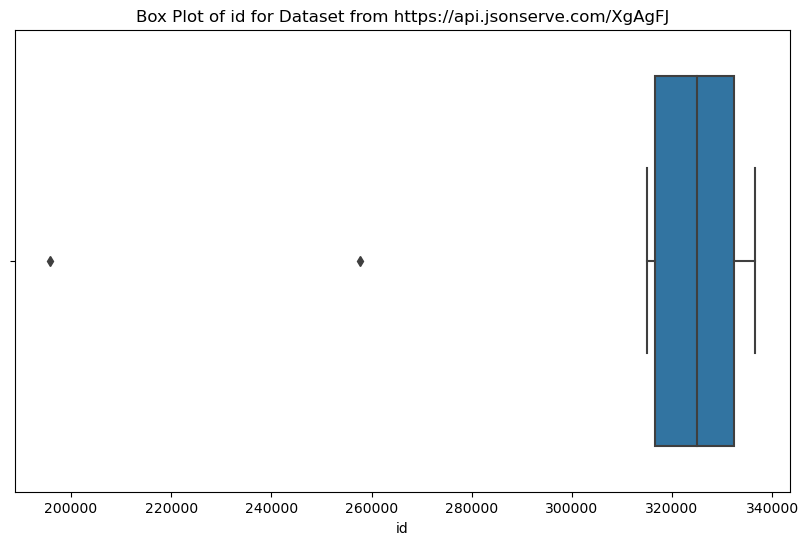

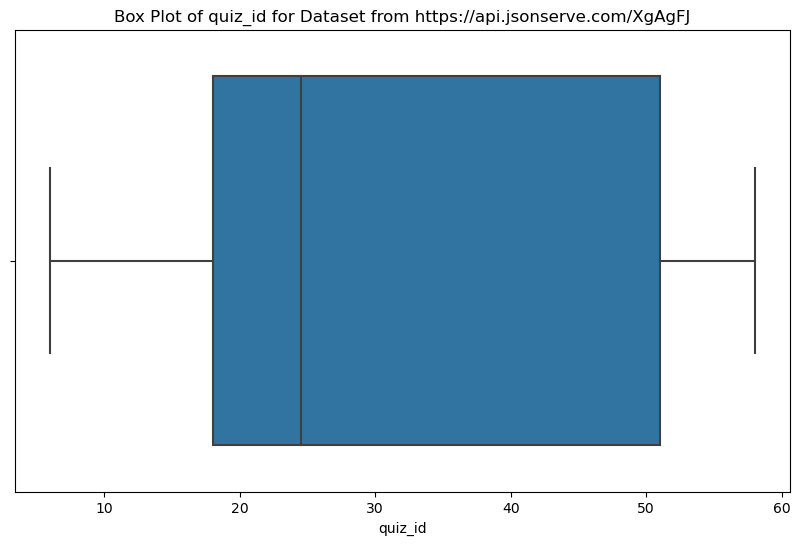

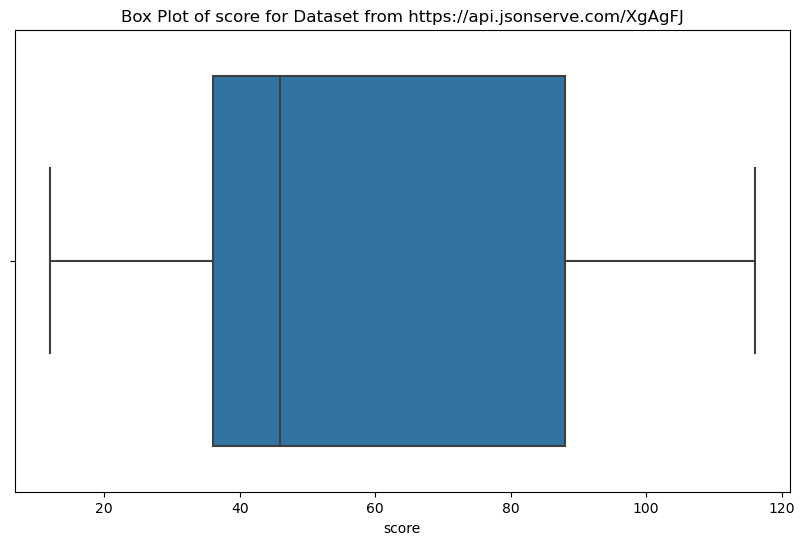

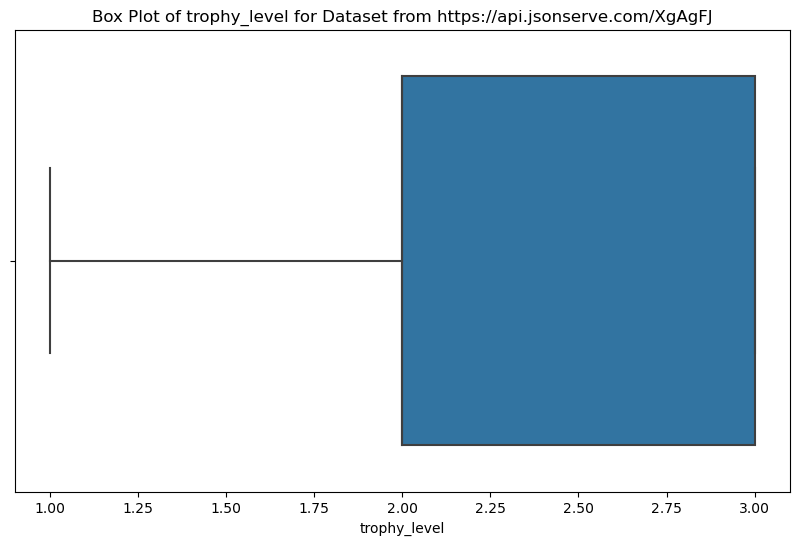

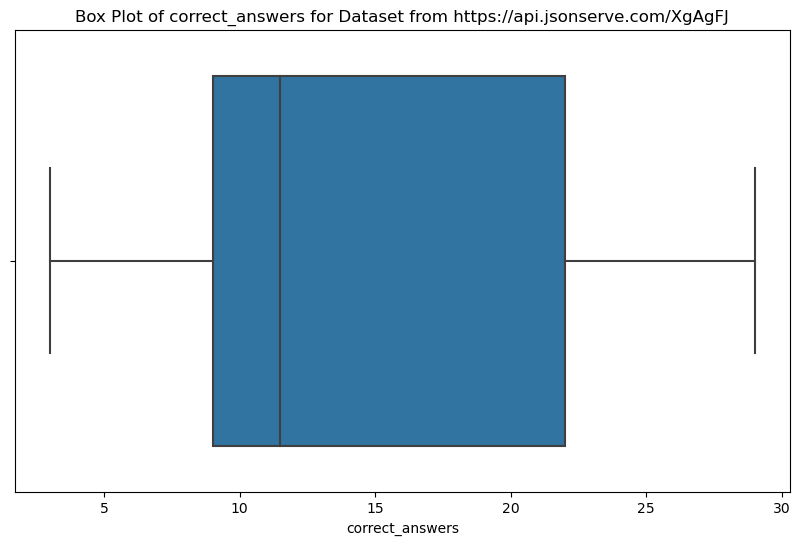

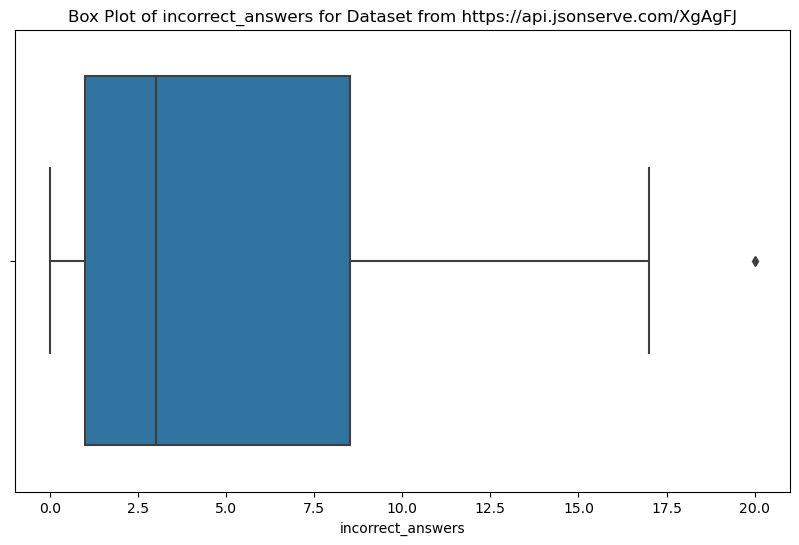

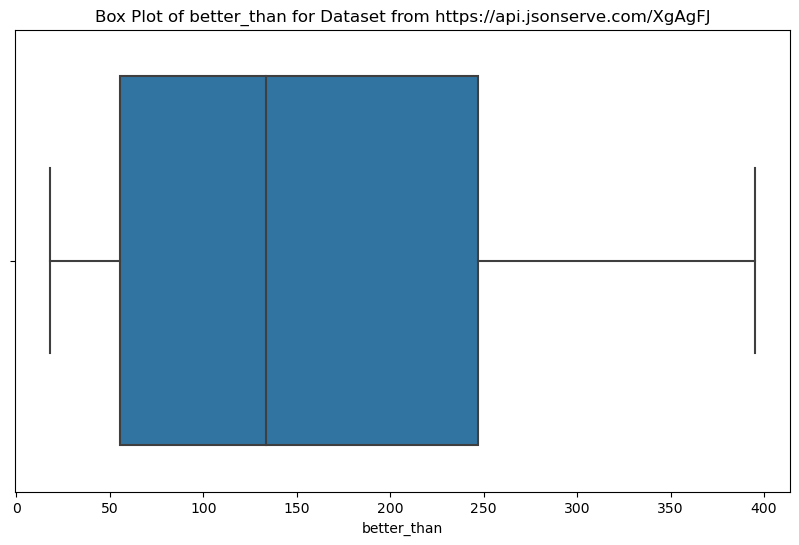

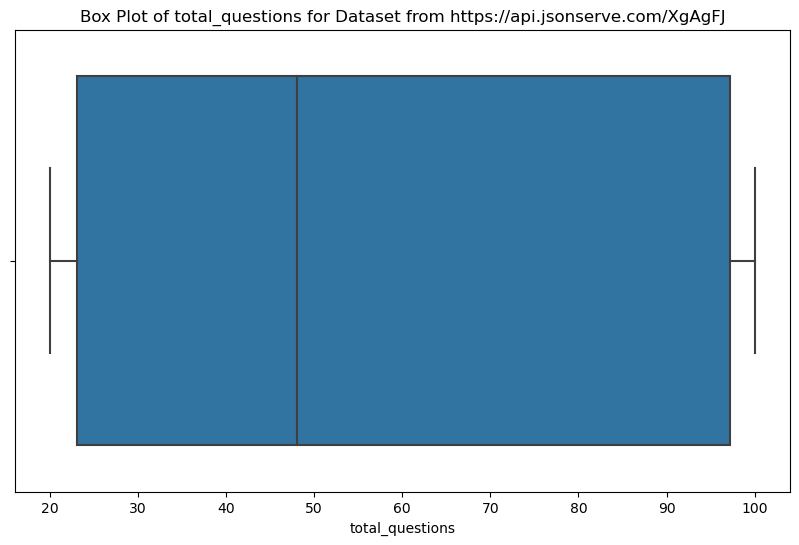

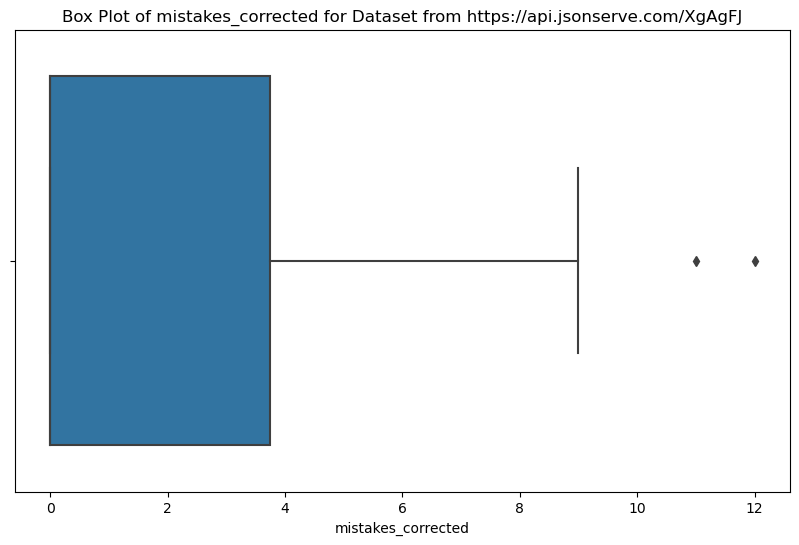

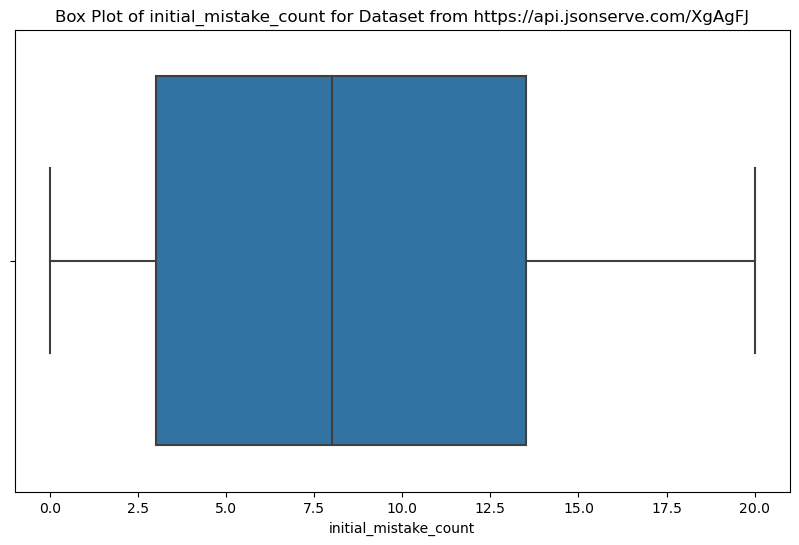

In [58]:
# Box plots for numerical columns
for url, df in dataframes.items():
    numerical_cols = df.select_dtypes(include='number').columns
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} for Dataset from {url}')
        plt.xlabel(col)
        plt.show()

This section generates a correlation matrix for the numerical columns in each dataset. It first checks if there are more than one numerical column using df.select_dtypes(include='number').shape[1]. If the condition is met, a heatmap is created using sns.heatmap() to visualize the correlations between numerical columns. The annot=True argument adds the correlation values to the heatmap, and fmt=".2f" formats the values to two decimal places. The color map coolwarm is used to represent positive and negative correlations, with a square layout for better readability. The heatmap provides insights into the relationships between numerical variables.

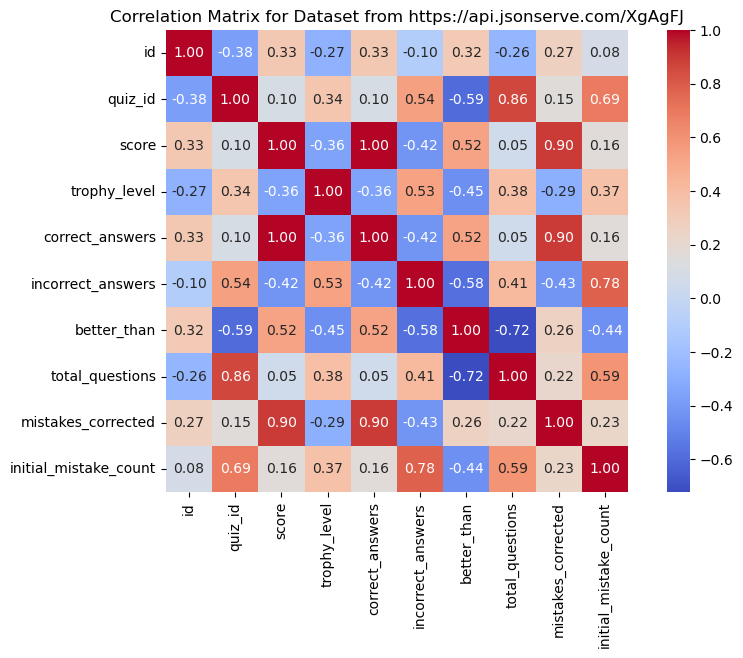

In [59]:
# Correlation matrix
for url, df in dataframes.items():
    if df.select_dtypes(include='number').shape[1] > 1:  # Check if there are numerical columns
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title(f'Correlation Matrix for Dataset from {url}')
        plt.show()

This section performs a group-by analysis on datasets that contain a categorical column (in this case, labeled 'category_column'). It checks if the column exists in the dataset, and if so, it groups the data by this categorical column and calculates the mean for each group using df.groupby('category_column').mean(). The result is printed to show the mean values for the numerical columns grouped by the categories in the specified column. If the categorical column does not exist in the dataset, a message is printed indicating that the column is missing.

In [60]:
# Group by analysis
for url, df in dataframes.items():
    if 'category_column' in df.columns:  # Replace with your actual categorical column
        group_analysis = df.groupby('category_column').mean()  # Replace with the column you want to analyze
        print(f"\nGroup by analysis for dataset from {url}:")
        print(group_analysis)
    else:
        print(f"'category_column' not found in dataset from {url}.")

'category_column' not found in dataset from https://api.jsonserve.com/XgAgFJ.


This section performs time series analysis on datasets that contain a date column (labeled 'date_column'). It first ensures that the date_column is in a valid datetime format using pd.to_datetime(). If the column is empty or contains invalid dates, it prints a message indicating that no valid dates were found. If valid dates are present, it sets the date_column as the index of the DataFrame. Then, it resamples the data by month ('M'), calculating the monthly average, and plots the result. The plot shows the trend of the numerical data over time, with the x-axis representing the date and the y-axis representing the average value. If the date column is missing, a message is printed.

In [61]:
# Time series analysis
for url, df in dataframes.items():
    if 'date_column' in df.columns:  # Replace with your actual date column
        df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')  # Ensure it's in datetime format
        if df['date_column'].isnull().all():
            print(f"No valid dates found in 'date_column' for dataset from {url}.")
        else:
            df.set_index('date_column', inplace=True)
            df.resample('M').mean().plot(figsize=(10, 6))  # Monthly average
            plt.title(f'Time Series Analysis for Dataset from {url}')
            plt.ylabel('Value')
            plt.show()
    else:
        print(f"'date_column' not found in dataset from {url}.")

'date_column' not found in dataset from https://api.jsonserve.com/XgAgFJ.


This section calculates and prints the average score for datasets that contain a column named 'score'. It checks if the column exists in the dataset, and if so, it computes the mean of the score column using df['score'].mean(). The result, which represents the average score for that dataset, is printed along with the corresponding URL. This simple analysis helps summarize the overall score distribution in each dataset.

In [62]:
# Example Analysis: Calculate average scores or counts
for url, df in dataframes.items():
    if 'score' in df.columns:  # Assuming there's a 'score' column
        average_score = df['score'].mean()
        print(f"Average score for dataset from {url}: {average_score}")

Average score for dataset from https://api.jsonserve.com/XgAgFJ: 60.285714285714285


This section generates a recommendation based on the average score for datasets containing a 'score' column. It first calculates the average score using df['score'].mean(). If the average score is below a threshold (in this case, 50, indicating weak performance), it prints a recommendation suggesting that the focus should be on improving scores. This type of analysis helps to provide actionable insights based on the data's overall performance.

In [45]:
# Example: Generate recommendations based on average scores
for url, df in dataframes.items():
    if 'score' in df.columns:
        average_score = df['score'].mean()
        if average_score < 50:  # Assuming 50 is a threshold for weak performance
            print(f"Recommendation for dataset from {url}: Focus on improving scores.")